In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
Sales = pd.read_csv("sales_data.csv")
df = Sales.copy()
df.head(3)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
0,ORD00076,PRD991,"Smartwatch, Camera, Headphones",154.88971109205679,8,0.15,CUST7975,2022-03-31 00:00:00,NaN,North
1,ORD00491,PRD400,Laptop,free,19,0.20,CUST6889,2021-01-06 00:00:00,Charlie,North
2,ORD00369,PRD957,Camera,770.6350827794904,16,0.05,CUST4092,Unknown,Alice,West


OrderID: Siparişin benzersiz kimliği.


ProductID: Ürünün benzersiz kimliği.


ProductName: Ürünün adı veya açıklaması.


UnitPrice: Birim fiyatı.


Quantity: Satın alınan ürün miktarı.


Discount: Uygulanan indirim oranı.


Region: Satışın gerçekleştiği bölge.

## Data Preparation -  EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      525 non-null    object 
 1   ProductID    525 non-null    object 
 2   ProductName  489 non-null    object 
 3   UnitPrice    498 non-null    object 
 4   Quantity     525 non-null    int64  
 5   Discount     525 non-null    float64
 6   CustomerID   470 non-null    object 
 7   SaleDate     518 non-null    object 
 8   Salesperson  473 non-null    object 
 9   Region       525 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 41.1+ KB


In [4]:
df.shape

(525, 10)

In [5]:
df.duplicated().sum()

15

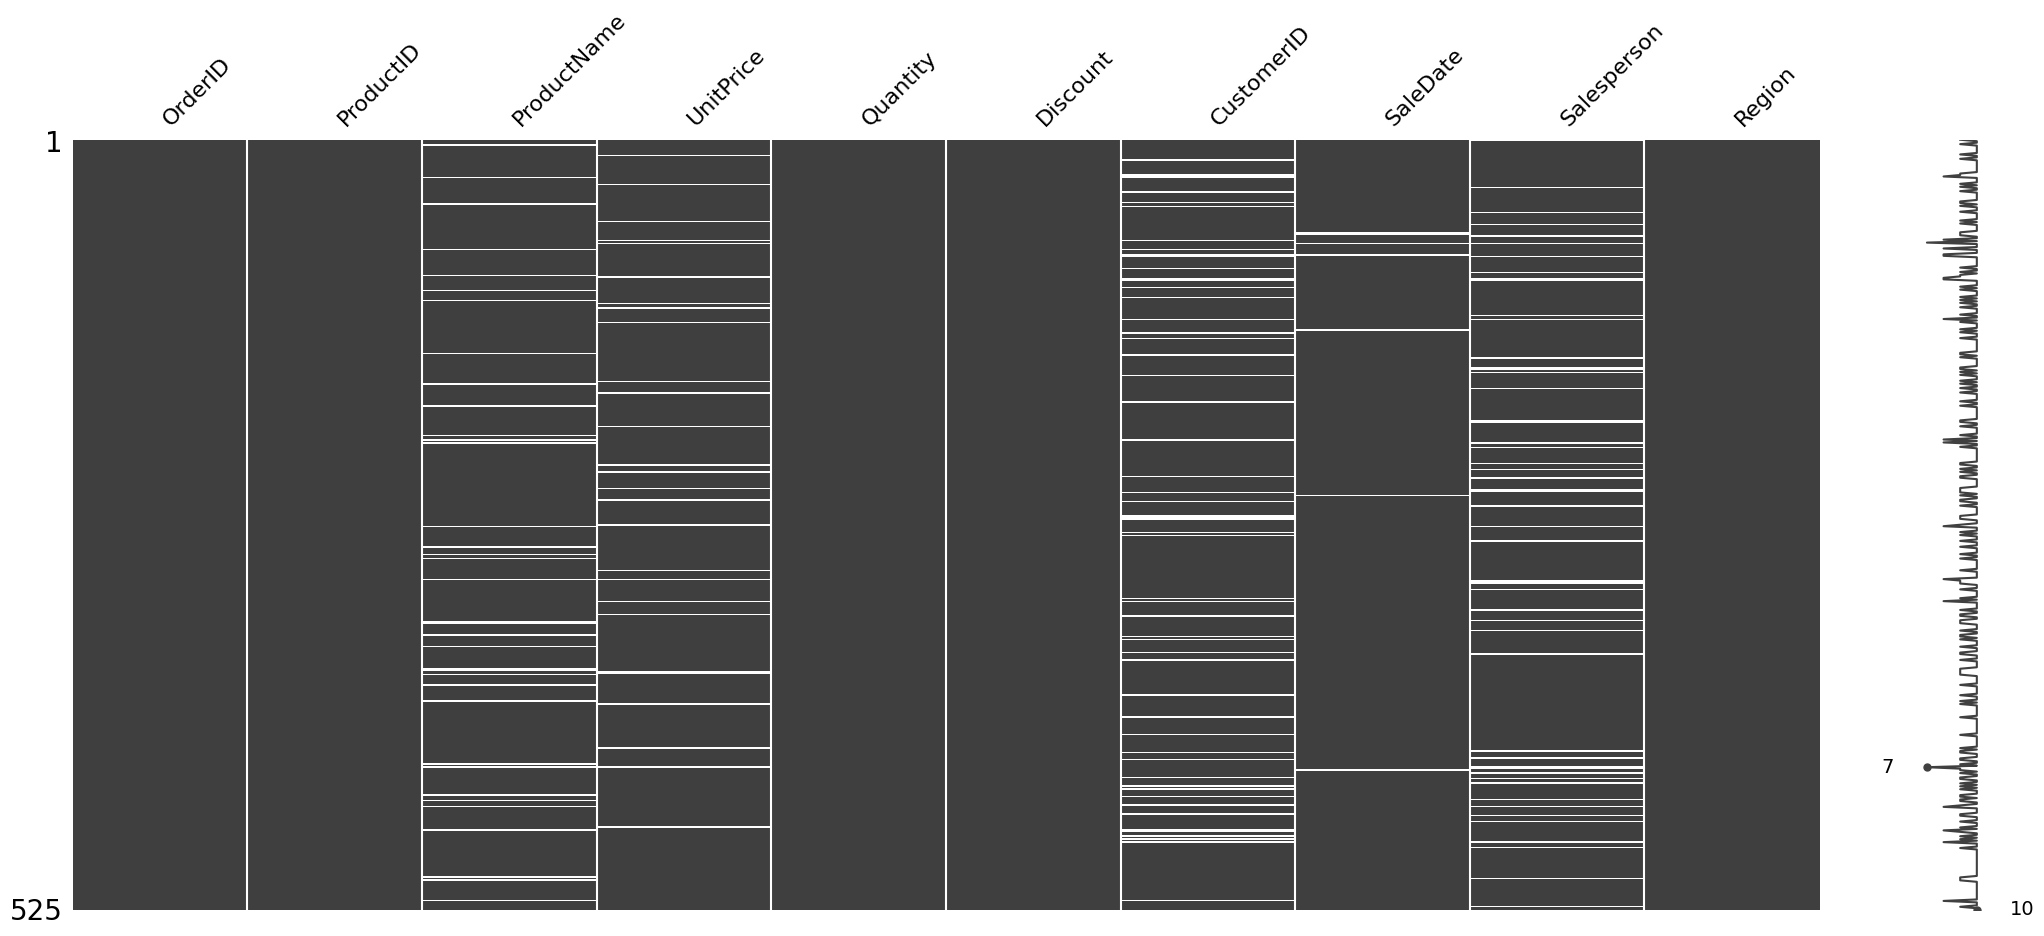

In [6]:
import missingno as msno
msno.matrix(df);

In [7]:
df.isnull().sum()[df.isnull().sum()>0]

ProductName    36
UnitPrice      27
CustomerID     55
SaleDate        7
Salesperson    52
dtype: int64

In [8]:
df["ProductName"].value_counts()

ProductName
Camera                                            97
Headphones                                        76
Laptop                                            72
Smartphone                                        61
Smartwatch                                        56
Headphons                                          8
Laptpo                                             4
Camra                                              4
Smartphone, Smartwatch, Laptop                     3
Smartphone, Camera, Headphones                     3
Smratphone                                         3
Smartwach                                          3
Camera, Smartphone, Laptop                         2
Camera, Camera, Camera, Smartwatch                 2
Headphones, Camera, Smartphone, Camera             2
Laptop, Laptop, Laptop                             2
Smartphone, Laptop, Smartwatch, Smartphone         2
Smartwatch, Camera, Headphones                     2
Laptop, Smartwatch, Smartphone, La

In [9]:
df["ProductName"].value_counts().index[0]

'Camera'

In [10]:
df["ProductName"] = df["ProductName"].fillna(df["ProductName"].value_counts().index[0])

In [11]:
df["UnitPrice"].value_counts()

UnitPrice
-                     35
Check                 21
free                  17
Ask                   11
Free                  10
526.7791193402791      2
570.4117591147564      2
636.0947881384428      2
1202.445729915751      2
480.1298143515237      2
1223.053894173907      2
462.6076268083847      2
1058.763169910721      2
1125.7862554975595     2
869.0605508270994      2
711.993847309011       2
957.1816118505659      2
851.4534046619215      2
1268.1980069799026     2
168.1416437004459      2
425.9059373310372      2
1258.5892397775865     2
528.5739596501116      2
99.00376311805849      2
82.95197721398569      2
1457.4799003640187     2
79.99146279634564      1
268.6731376817031      1
154.88971109205679     1
1295.6889385146426     1
435.3498708570507      1
85.23685393657101      1
1162.9484471079015     1
1378.724275593982      1
1382.889529388595      1
724.7038358013738      1
899.9114869319098      1
462.41478598545746     1
854.6729035841178      1
198.39136137972

In [12]:
df["UnitPrice"] = df["UnitPrice"].replace(["Check", "Ask","free","Free","-"], np.nan)

In [13]:
df["UnitPrice"].fillna(method="bfill", inplace=True)

In [14]:
df.isnull().sum()[df.isnull().sum()>0]

CustomerID     55
SaleDate        7
Salesperson    52
dtype: int64

In [15]:
df["CustomerID"].value_counts()

CustomerID
CUST8217    3
CUST9395    3
CUST6827    2
CUST6391    2
CUST1839    2
CUST8044    2
CUST7286    2
CUST8963    2
CUST7290    2
CUST3743    2
CUST5836    2
CUST3360    2
CUST4393    2
CUST4237    2
CUST2007    2
CUST5140    2
CUST6416    2
CUST7659    2
CUST7064    2
CUST3358    2
CUST9977    2
CUST3751    2
CUST1114    2
CUST8693    2
CUST1147    2
CUST2238    2
CUST4483    2
CUST1132    2
CUST6996    1
CUST7095    1
CUST5663    1
CUST8679    1
CUST4396    1
CUST8302    1
CUST2558    1
CUST1447    1
CUST8390    1
CUST2324    1
CUST5109    1
CUST8188    1
CUST1452    1
CUST4224    1
CUST1112    1
CUST1443    1
CUST2072    1
CUST4933    1
CUST3476    1
CUST8269    1
CUST1569    1
CUST7663    1
CUST7667    1
CUST1709    1
CUST2879    1
CUST3338    1
CUST7605    1
CUST8924    1
CUST4355    1
CUST3013    1
CUST5385    1
CUST5360    1
CUST7797    1
CUST4417    1
CUST5225    1
CUST2884    1
CUST2285    1
CUST7547    1
CUST4902    1
CUST5751    1
CUST1339    1
CUST7975    1
CUST5972 

In [24]:
df["CustomerID"].value_counts()

CustomerID
CUST8217    3
CUST9395    3
CUST6827    2
CUST6391    2
CUST1839    2
CUST8044    2
CUST7286    2
CUST8963    2
CUST7290    2
CUST3743    2
CUST5836    2
CUST3360    2
CUST4393    2
CUST4237    2
CUST2007    2
CUST5140    2
CUST6416    2
CUST7659    2
CUST7064    2
CUST3358    2
CUST9977    2
CUST3751    2
CUST1114    2
CUST8693    2
CUST1147    2
CUST2238    2
CUST4483    2
CUST1132    2
CUST6996    1
CUST7095    1
CUST5663    1
CUST8679    1
CUST4396    1
CUST8302    1
CUST2558    1
CUST1447    1
CUST8390    1
CUST2324    1
CUST5109    1
CUST8188    1
CUST1452    1
CUST4224    1
CUST1112    1
CUST1443    1
CUST2072    1
CUST4933    1
CUST3476    1
CUST8269    1
CUST1569    1
CUST7663    1
CUST7667    1
CUST1709    1
CUST2879    1
CUST3338    1
CUST7605    1
CUST8924    1
CUST4355    1
CUST3013    1
CUST5385    1
CUST5360    1
CUST7797    1
CUST4417    1
CUST5225    1
CUST2884    1
CUST2285    1
CUST7547    1
CUST4902    1
CUST5751    1
CUST1339    1
CUST7975    1
CUST5972 

In [17]:
df["SaleDate"].value_counts()

SaleDate
TBD                    10
Unknown                 8
2022-03-31 00:00:00     3
2020-07-21 00:00:00     3
2022-09-06 00:00:00     3
2022-04-22 00:00:00     3
2022-03-26 00:00:00     3
2020-04-01 00:00:00     3
2021-01-04 00:00:00     2
2020-02-26 00:00:00     2
2022-09-29 00:00:00     2
2021-10-26 00:00:00     2
2023-02-10 00:00:00     2
2020-05-24 00:00:00     2
2022-05-17 00:00:00     2
2020-09-04 00:00:00     2
2020-08-02 00:00:00     2
2021-08-13 00:00:00     2
2022-02-09 00:00:00     2
2020-09-25 00:00:00     2
2021-03-15 00:00:00     2
2022-09-11 00:00:00     2
2023-10-05 00:00:00     2
2023-12-04 00:00:00     2
2022-05-12 00:00:00     2
2021-12-29 00:00:00     2
2023-03-27 00:00:00     2
2021-03-31 00:00:00     2
2021-06-08 00:00:00     2
2021-06-02 00:00:00     2
2021-06-13 00:00:00     2
2021-01-12 00:00:00     2
2023-05-30 00:00:00     2
2023-08-06 00:00:00     2
2021-07-08 00:00:00     2
2023-02-21 00:00:00     2
2021-06-12 00:00:00     2
2022-05-16 00:00:00     2
202

In [18]:
df["SaleDate"] = df["SaleDate"].replace(["TBD","Unknown"], np.nan)
df["SaleDate"].fillna(method="bfill", inplace=True)

In [19]:
df["SaleDate"] = pd.to_datetime(df["SaleDate"])

In [20]:
df["Salesperson"].value_counts()

Salesperson
Diana      100
Alice       95
Charlie     87
Bob         84
Evan        81
Daina        8
Ailce        8
Eavn         5
Bbo          4
Chalrie      1
Name: count, dtype: int64

In [21]:
df.sample(1)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
290,ORD00045,PRD755,Headphones,1119.0608838108708,3,0.2,CUST7870,2022-11-11,Bob,West


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      525 non-null    object        
 1   ProductID    525 non-null    object        
 2   ProductName  525 non-null    object        
 3   UnitPrice    525 non-null    object        
 4   Quantity     525 non-null    int64         
 5   Discount     525 non-null    float64       
 6   CustomerID   470 non-null    object        
 7   SaleDate     525 non-null    datetime64[ns]
 8   Salesperson  473 non-null    object        
 9   Region       525 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 41.1+ KB


In [23]:
df.isnull().sum()[df.isnull().sum()>0]

CustomerID     55
Salesperson    52
dtype: int64

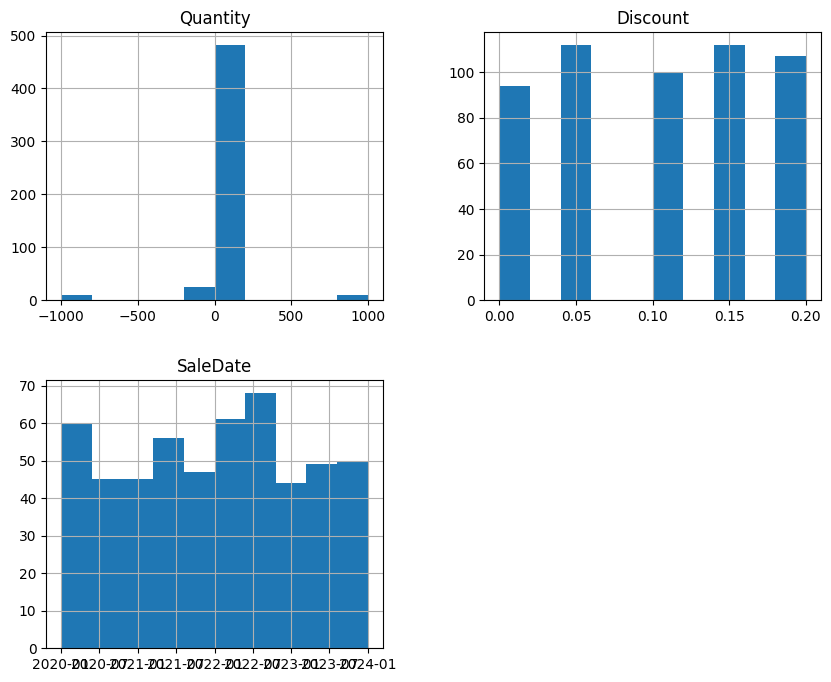

In [25]:
df.hist(figsize=(10, 8))
plt.show();

In [29]:
df.sample(1)

,OrderID,ProductID,ProductName,UnitPrice,Quantity,Discount,CustomerID,SaleDate,Salesperson,Region
335,ORD00284,PRD418,Headphones,689.7328922094955,3,0.0,CUST5109,2020-12-25,Diana,North


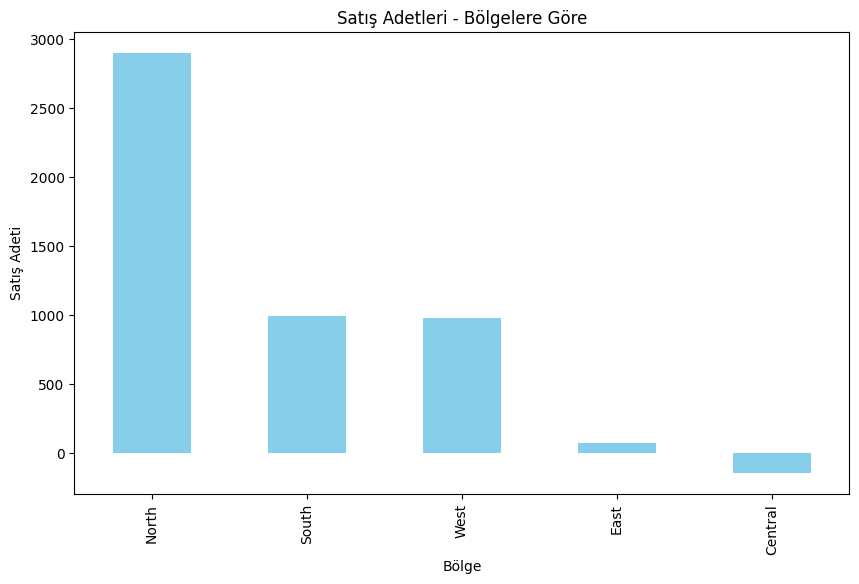

In [30]:
region_sales = df.groupby('Region')['Quantity'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Satış Adetleri - Bölgelere Göre')
plt.xlabel('Bölge')
plt.ylabel('Satış Adeti')
plt.show()

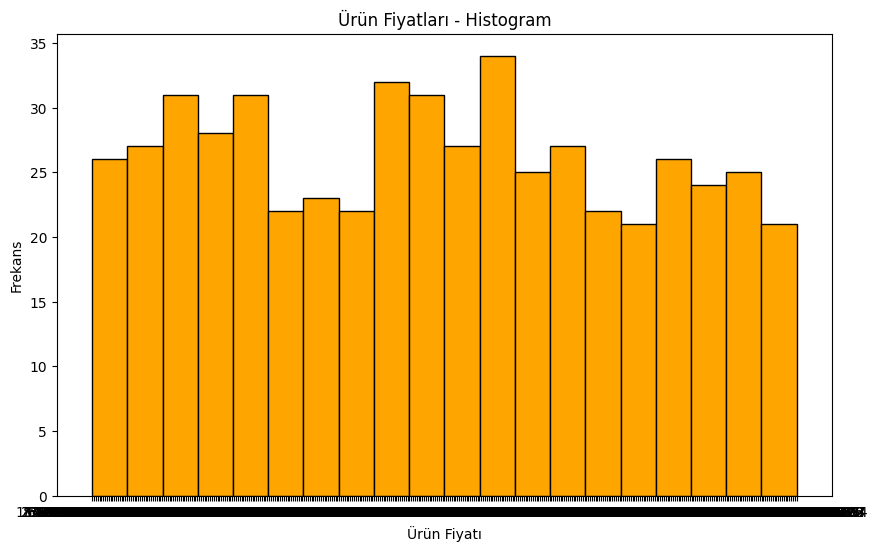

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df['UnitPrice'], bins=20, color='orange', edgecolor='black')
plt.title('Ürün Fiyatları - Histogram')
plt.xlabel('Ürün Fiyatı')
plt.ylabel('Frekans')
plt.show()

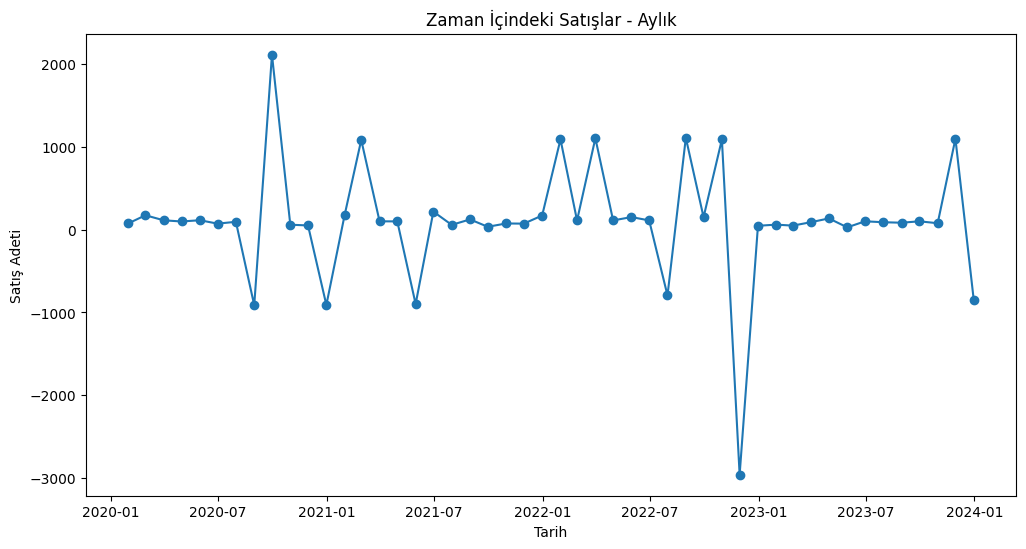

In [34]:
df['SaleDate'] = pd.to_datetime(df['SaleDate'])
monthly_sales = df.resample('M', on='SaleDate')['Quantity'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Zaman İçindeki Satışlar - Aylık')
plt.xlabel('Tarih')
plt.ylabel('Satış Adeti')
plt.show()
